In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df = pd.read_csv(r'...\Data\train.csv')

In [3]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
df.shape

(82657, 12)

In [5]:
df.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [6]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [8]:
df.nunique()

user_name                15
country                  38
review_title          76983
review_description    77628
designation           26424
points                   21
price                   351
province                358
region_1               1019
region_2                 17
winery                13786
variety                  28
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(77641, 12)

In [11]:
df.groupby(['variety']).count()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
variety,,,,,,,,,,,
Bordeaux-style Red Blend,4712,5206,5206,5206,2773,5206,3986,5206,5027,1283,5206
Bordeaux-style White Blend,792,806,806,806,320,806,516,806,800,35,806
Cabernet Franc,634,1027,1028,1028,641,1028,989,1027,986,648,1028
Cabernet Sauvignon,4638,7153,7155,7155,4384,7155,7093,7153,6301,5361,7155
Champagne Blend,958,1075,1075,1075,1073,1075,922,1075,1061,58,1075
Chardonnay,6416,8833,8836,8836,5910,8836,8324,8833,8044,4775,8836
Gamay,757,759,759,759,569,759,613,759,751,4,759
Gewürztraminer,571,791,792,792,546,792,744,791,730,266,792
Grüner Veltliner,947,976,976,976,865,976,829,976,77,71,976


### Part 1 (Analysis)

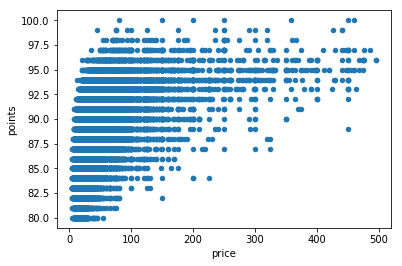

In [12]:
df[df['price'] < 500].plot.scatter(x='price', y='points')

This plot shows us that more expensive wines do generally earn more points when reviewed.

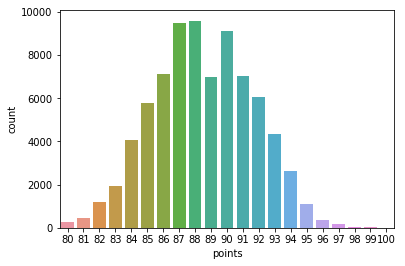

In [13]:
sns.countplot(df['points'])

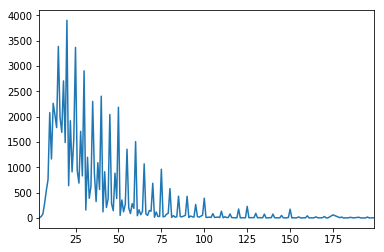

In [14]:
df[df['price'] < 200]['price'].value_counts().sort_index().plot.line()

Now, plotting boxplots having top 10 varieties of wines with points.

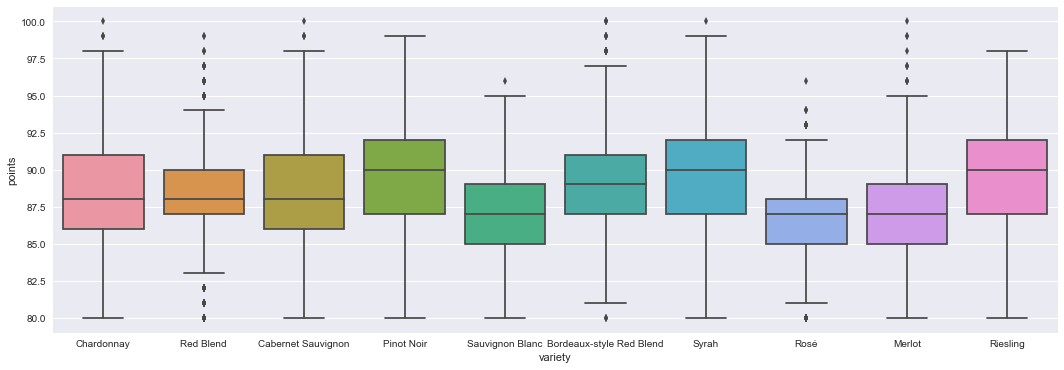

In [15]:
dff = df[df.variety.isin(df.variety.value_counts().head(10).index)]
sns.set(rc={'figure.figsize':(18,6)})
sns.boxplot(x='variety',y='points',data=dff)

Let's now plot subplots showing counts of **points , price , variety , province**.

Text(0.5,1,'Wine Origins')

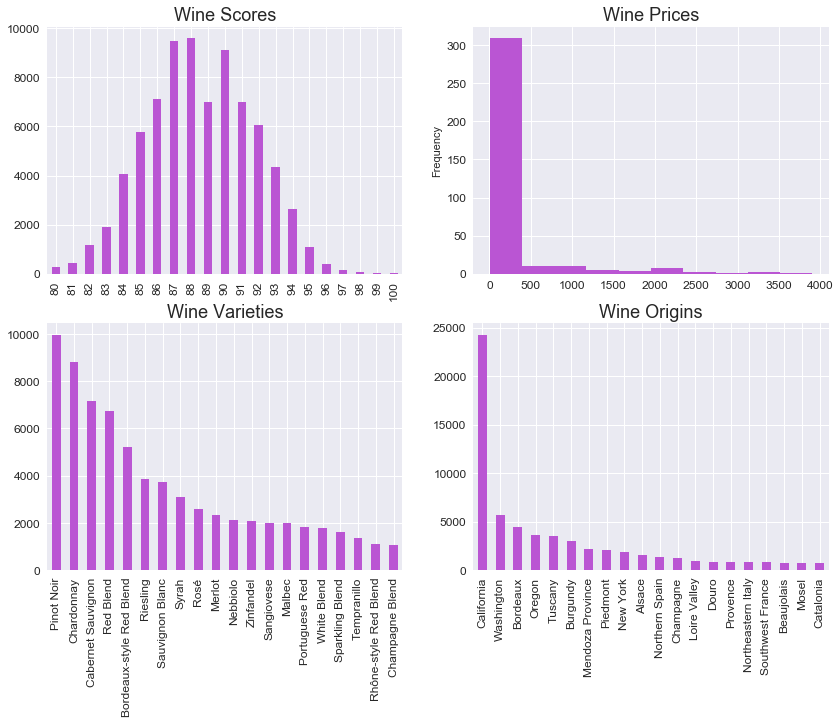

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

df['points'].value_counts().sort_index().plot.bar(ax=ax[0][0], fontsize=12, color='mediumorchid')
ax[0][0].set_title("Wine Scores", fontsize=18)

df['price'].value_counts().plot.hist(ax=ax[0][1], fontsize=12, color='mediumorchid')
ax[0][1].set_title("Wine Prices", fontsize=18)

df['variety'].value_counts().head(20).plot.bar(ax=ax[1][0], fontsize=12, color='mediumorchid')
ax[1][0].set_title("Wine Varieties", fontsize=18)

df['province'].value_counts().head(20).plot.bar(ax=ax[1][1], fontsize=12, color='mediumorchid')
ax[1][1].set_title("Wine Origins", fontsize=18)



### Part 2 (Predictive Modeling )

In [17]:
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
sw = stopwords.words('english')

In [18]:
df['variety']=df['variety'].str.lower()

Label Encoding the variety column using LabelEncoder.

In [19]:
le = LabelEncoder()

output = le.fit_transform(df['variety'])

In [20]:
data = df['review_description'].str.lower()

Using TF-IDF vectorizer to convert words to Vector Space.

In [21]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True,stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(data) 

Implementing different models and checking thier accuracies.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, output, test_size=0.2, random_state=5)

In [24]:
LR = LogisticRegression()

LR.fit(x_train,y_train)

pred = LR.predict(x_test)

In [25]:
accuracy_score(y_test, pred)

0.68021121772168203

Let's tune C parameter in the Logistic Regression.

In [26]:
C_param_range = [0.001,0.01,0.1,1,10,100]
pred_score = []
for i in C_param_range:
    
    lr = LogisticRegression( C = i,random_state = 0)
    lr.fit(x_train,y_train)
    
    predic = lr.predict(x_test)
    
    pred_score.append(accuracy_score(y_test, predic))

In [27]:
pred_score

[0.19544078820271749,
 0.36396419602034902,
 0.55476849764955893,
 0.68021121772168203,
 0.693669907914225,
 0.65245669392749051]

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(n_estimators=100,max_features = 'sqrt')
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.62199755296541959

I have tried 2 more algos but didn't attached the code because of memory issues.

So, the best accuracy we got from __Logistic Regression__ with C_parameter value equals to 10.
Let's train the model & start predicting.

In [30]:
LR = LogisticRegression(C=10,random_state = 2)

LR.fit(x_train,y_train)
LR_pred = LR.predict(x_test)
accuracy_score(y_test, LR_pred)

0.693669907914225

In [31]:
df_test = pd.read_csv(r'...\Data\test.csv')

In [32]:
test_data = df['review_description'].str.lower()
tfidf_vectorizer = TfidfVectorizer(use_idf=True,stop_words='english')
tfidf_matrix_test = tfidf_vectorizer.fit_transform(test_data)
LR_pred_test = LR.predict(tfidf_matrix_test)

## Insights from the Data

* Average rating of wines is about 88 whereas minimim rating is 80.
* There are 28 varieties of wines.
* Top wine variety is Pinot Noir followed by Chardonnay.
* California tops the wine origins chart with a count of 24275.

## Summary

In this dataset, we have predicted the wine varieties by using reviews description.
At first, we clean the data, then analysis was done through visualization techniques using matplotlib & seaborn.

After implementing various algorithms, highest accuracy was achieved by **Logistic Regression** (**69.3 %**) in the training data.  
The accuracy can be increased further by using Deep Learning models.